# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.

**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов

In [27]:
# Bot check

# HW_ID: fpmi_ad6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set1')
%matplotlib inline
pd.options.mode.chained_assignment = None

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1. Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.**

**Решение.**

Рассмотрим задачу поиска коэффициентов с помощью МНК: $F = ||y - x\theta ||^2 \rightarrow \min\limits_{\theta \in \mathbb{R}}$
$$F = \sum_{i=1}^n |y_i {-} \theta x_i|^2 = \sum_{i=1}^n y_i^2 {-} 2\theta \sum_{i=1}^n y_i x_i {+} \theta^2\sum_{i=1}^n x_i^2$$
Т.к. необходимо минимизировать функцию, возьмем производную по $\theta$ и приравняем к нулю:
$${-} 2\sum_{i=1}^n y_i x_i {+} 2\theta\sum_{i=1}^n x_i^2 = 0$$.

Получаем **ответ:** $$\widehat\theta = \frac{\sum_{i=1}^n y_i x_i}{\sum_{i=1}^n x_i^2}$$


**2. Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).**

**Решение.**

Формула градиентного спуска: $\theta_{t+1} = \theta_t - \eta \nabla_{\theta}$, где $\nabla_{\theta} = {-} 2\sum_{i=1}^n y_i x_i {+} 2\theta\sum_{i=1}^n x_i^2$

Формула стохастического градиентного спуска: $\theta_{t+1} = \theta_t - \eta \nabla_{\theta j}$, где $\nabla_{\theta j} = {-} 2\sum_{j=1}^k y_{i_j} x_{i_j} {+} 2\theta\sum_{j=1}^k x_{i_j}^2$ 

Батч определяется на каждом шаге с помощью стандартного распределения: $i_1....i_k \sim U\{0, ..., n\} $

**3. Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.**

**Решение.**

$$E(\widehat\theta) = E(\frac{\sum_{i=1}^n y_i x_i}{\sum_{i=1}^n x_i^2})$$
Подставим в формулу следующее: $y_i = \theta x_i + \varepsilon_i$. Тогда

$$E(\widehat\theta) = E(\frac{\sum_{i=1}^n \theta x_i^2 + \varepsilon_i x_i}{\sum_{i=1}^n x_i^2})$$
$$E(\widehat\theta) = E(\theta + \frac{\sum_{i=1}^n \varepsilon_i}{\sum_{i=1}^n x_i}) = \theta$$
Аналогично, находим $E(\widehat{y}) = E(\widehat{\theta} x) = \theta x$


**4. Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$**

**Решение.**


$$D(\widehat\theta) = D(\frac{\sum_{i=1}^n y_i x_i}{\sum_{i=1}^n x_i^2})$$
Подставим в формулу следующее: $y_i = \theta x_i + \varepsilon_i$. Тогда

$$D(\widehat\theta) = D(\frac{\sum_{i=1}^n \theta x_i^2 + \varepsilon_i x_i}{\sum_{i=1}^n x_i^2})$$
$$D(\widehat\theta) = \frac{\sum_{i=1}^n D(\varepsilon_i x_i)}{\sum_{i=1}^n x_i^2} = \frac{\sigma^2}{\sum_{i=1}^n x_i^2}$$

Дисперсия может оказаться в сумме благодаря независимости признаков.

Аналогично, находим $$D(\widehat{y}) = \frac{\sigma^2 x^2}{\sum_{i=1}^n x_i^2}$$

**5. При каких условиях дисперсии в пункте 4 конечны? Подумайте и ответьте на вопрос, как ведет себя дисперсия предсказания в многомерном случае если матрица $X^T X$ близка к вырожденной.**

**Решение.**

Дисперсия вырастет, т.к. с матрицей, близкой к вырожденной, собственные значения сильно различаются, а некоторые близки к нулю. Следовательно, модель будет сильнее чувствовать выбросы в данных, т.е. переобучится.



*Замечания.* 
1. В пунктах 3-5 речь идет о $\widehat{\theta}$, которая является *решением* задачи метода наименьших квадратов. Поэтому пользуйтесь явной формулой этого решения, а не формулами методов вычисления решения.
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитай требования к формату решения в правилах сдачи задания.**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

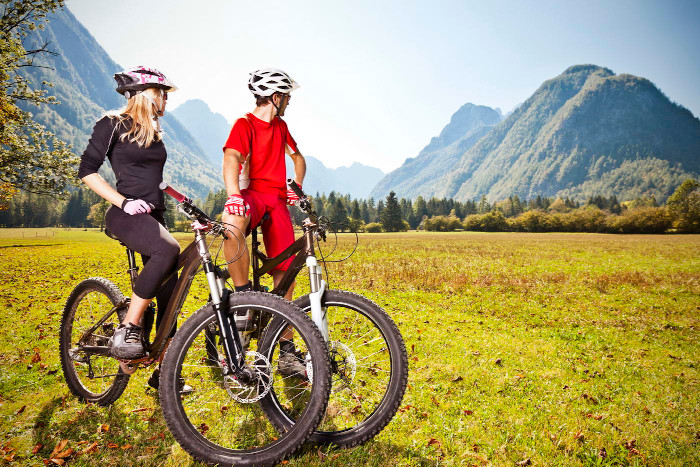

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [30]:
data = pd.read_csv("day.csv")
data = data.drop(columns=['instant', 'dteday', 'yr', 'casual', 'registered'])

Сделаем категориальные признаки читабельными

In [31]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
          'September', 'October', 'November', 'December']
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for ind in data.index:
    data['mnth'][ind] = months[data['mnth'][ind] - 1]
    data['season'][ind] = seasons[data['season'][ind] - 1]
    data['weekday'][ind] = days[data['weekday'][ind]]

train, test = train_test_split(data, test_size=0.2)

test['mnth']

524 June
183 July
240 August
387 January
227 August
 ... 
365 January
267 September
98 April
495 May
287 October
Name: mnth, Length: 147, dtype: object

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строит информативные графики.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

In [32]:
#Разделим на категориальные и количественные признаки
categorial_features = ['season', 'mnth', 'weekday']
real_features = ['holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

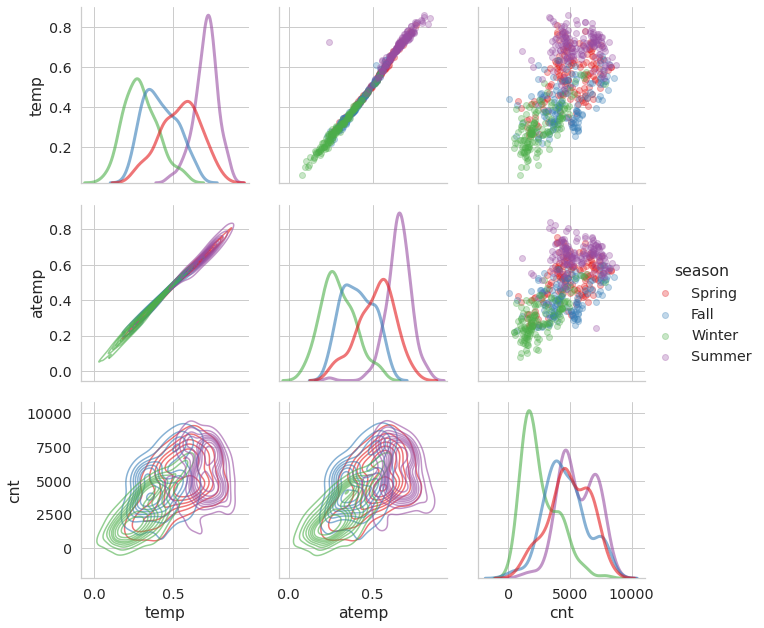

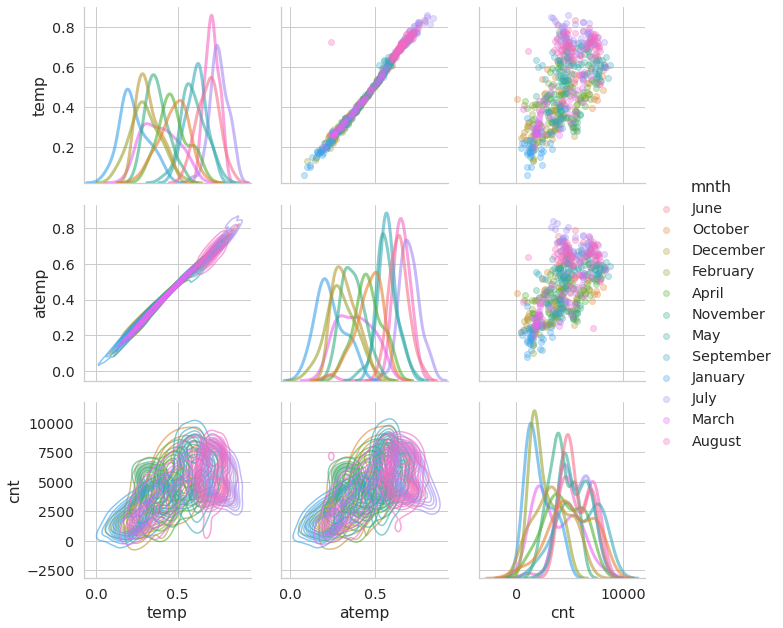

In [33]:
for hue in categorial_features[:2]:
    g = sns.PairGrid(train[['temp', 'atemp', 'cnt', hue]], 
                     hue=hue, diag_sharey=False, height=3)
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании
    
    g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.


**Выводы по графикам:**

1. Выбросов мало, но от них необходимо избавиться

2. Самым важным из построенных графиков является следующий вывод: признаки **temp** и **atemp** линейно зависимы. Последствия этого описаны в задачах №1.5 и №3. Избавимся от этого в следующих пунктах.

    Также можно заметить, что на графиках плотности целевого признака **cnt** есть четко отделимые всплески, которые зависят от сезона и месяца: чем холоднее период, тем выше плотность на меньшем значении числа проката. 

    На графиках cnt-temp визуально определяется зависимость между температурой и количеством проката. Можно сделать вывод, что по этому признаку очень выгодно предсказывать целевое значение. 

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

**a)** Применим One-Hot-Encoding к категориальным признакам. Не забудем о названиях колонок, чтобы в любой момент нашего исследования данные оставались читабельными.

**б)** Избавимся от выбросов. Исходя из графиков предыдущего пункта, достаточно будет взять по 2 процента с начала и конца датафрейма по каждому количественному признаку.

Реализуйте данную процедуру.

In [34]:
def categorial_encoding(data_input, cat_features):
    encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
    data_cat_arr = encoder.fit_transform(data_input[cat_features])
    answer = pd.DataFrame(data_cat_arr, columns=encoder.get_feature_names_out(cat_features))
    
    return answer

#Избавляемся от выбросов
train = train[int(len(train)*0.02):]
train = train[:int(len(train)*0.98)]

test = test[int(len(test)*0.02):]
test = test[:int(len(test)*0.98)]

#Собираем все в один DF
X_train = np.hstack([train[real_features], categorial_encoding(train, categorial_features)])
X_test = np.hstack([test[real_features], categorial_encoding(test, categorial_features)])
print(X_test.shape)

(142, 27)


#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [35]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

model.coef_

array([-1.00500375e+17, -1.00500375e+17, -4.36496672e+02, 6.17422551e+03,
 7.20137317e+02, -2.70943209e+03, -3.58170759e+03, -8.81980989e+02,
 -6.96054475e+02, -1.80959611e+03, -7.66051809e+02, -3.75837395e+02,
 8.37150467e+01, 1.42299082e+02, -1.34310045e+03, -7.07845613e+02,
 3.63886540e+02, 2.25000000e+02, -5.80750000e+02, 4.50000000e+00,
 1.96000000e+02, -1.00500375e+17, 2.64500000e+02, -1.00500375e+17,
 8.80000000e+01, 4.80000000e+01, 1.60000000e+02])

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [36]:
test_preds = model.predict(X_test)

#RMSE

print("RMSE: ", np.sqrt(((test[target_feature] - test_preds) ** 2).mean()))
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

#MAE
print("MAE: ", metrics.mean_absolute_error(test[target_feature], test_preds))

#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

print("MAPE: ", mean_absolute_percentage_error(test[target_feature], test_preds))

RMSE:  1260.5958293880012
MAE:  1111.0704225352113
MAPE:  29.181065670379034


Попробуйте посчитать **оценку коэффициентов** с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

**Ответ:** Как уже говорилось выше, линейная зависимость между признаками приводит к переобучению. Избавимся от нее, удалив признак atemp.

In [37]:
X_mult = X_train.T @ X_train
X_mult = (np.linalg.pinv(X_mult))

model_coefs = X_mult @ X_train.T
model_coefs = model_coefs @ train[target_feature]

print(model_coefs)

[ 4643.15280397  5091.5094119   -486.23247516  6147.85895406
   838.38380994 -2727.47029517 -3519.97487406  -850.77327998
  -677.69365859 -1803.43594201  -770.60253368  -337.31864373
   109.3567189    167.18861217 -1339.10352831  -701.02210958
   385.36778003   227.84537361  -544.61382427    41.22033108
   185.07600982  4868.77828162   239.86385289  5409.24807018
    53.46255969    11.28077907   136.13021764]


Посчитаем ошибку на данных коэффициентах

In [38]:
test_preds_formula = X_test @ model_coefs

#RMSE
print("RMSE: ", np.sqrt(((test[target_feature] - test_preds_formula) ** 2).mean()))

#MAE
print("MAE: ", metrics.mean_absolute_error(test[target_feature], test_preds_formula))

#MAPE
print("MAPE: ", mean_absolute_percentage_error(test[target_feature], test_preds_formula))

RMSE:  1260.8890626484879
MAE:  1114.1316082727458
MAPE:  29.50827348421229


Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [39]:
#Избавимся от линейной зависимости
real_features = real_features = ['holiday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed']

X_train = np.hstack([train[real_features], categorial_encoding(train, categorial_features)])
X_test = np.hstack([test[real_features], categorial_encoding(test, categorial_features)])

#Считаем коэффициенты
X_mult = X_train.T @ X_train
X_mult = (np.linalg.pinv(X_mult))

model_coefs = X_mult @ X_train.T
model_coefs = model_coefs @ train[target_feature]

print(model_coefs)

#Считаем ошибку предсказания
test_preds_formula = X_test @ model_coefs

#RMSE
print("RMSE: ", np.sqrt(((test[target_feature] - test_preds_formula) ** 2).mean()))

#MAE
print("MAE: ", metrics.mean_absolute_error(test[target_feature], test_preds_formula))

#MAPE
print("MAPE: ", mean_absolute_percentage_error(test[target_feature], test_preds_formula))

[ 4671.4072261   5126.90283598  -487.74157554  6915.76823472
 -2720.88869188 -3567.04390735  -853.51027163  -680.70531272
 -1805.27185642  -795.71412421  -339.41773959   106.7029827
   162.60487366 -1353.51553492  -714.97599061   382.3701749
   219.75425824  -548.39028185    35.75643995   171.7104165
  4903.66817746   235.1453848   5444.07943538    51.89592252
    12.34552502   135.50766127]
RMSE:  1261.561762552157
MAE:  1114.7923403025136
MAPE:  29.51245762434717


Сделайте выводы.

**Выводы:**

На сырых данных получается приемлемая среднее отклонение - около 30%. Такой результат получилось незначительно улучшить, удалив признаки, которые коррелировали друг с другом - 29%. Однако итоговый набор коэффициентов выглядит неестественно - слишком большой разброс в значениях, величина их слишком большая. Следовательно, можно получить лучшее значение.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

$$\widehat\theta = (X^TX + \lambda I_k)^{-1}X^Ty$$

При оценке МНК существует риск сильной обусловенности, что приводит, как мы увидели в прошлом задании, к неестественно большим и разнящимся коэффициентам. А при почти вырожденной матрице решение может оказаться не единственным. В модели ridge-регрессии число обусловленности падает с увеличением $\lambda$, а матрица будет положительно определенной.

Накладывая такой "штраф" в виде коэффициента регуляризации, ridge-регрессия не позволяет коэффициентам достигать *экстремальных* значений, что решает проблему обратимости матриц в МНК путём уменьшения дисперсии предсказания.

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

Формула для оценки коэффициентов методом градиентного спуска для модели ridge-регрессии выглядит следующим образом:

$\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} (J(\theta) + \lambda \sum_{i=1}^{n} \theta_i^2)$

где $\theta_j$ - j-й коэффициент модели, $\alpha$ - скорость обучения (learning rate), $J(\theta)$ - функция потерь, определяющая ошибку модели, $\lambda$ - коэффициент регуляризации, n - количество признаков.

Формула для оценки коэффициентов стохастическим градиентным спуском для модели ridge-регрессии выглядит следующим образом:

$\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} (J(\theta) + \lambda \sum_{i \in batch}^{ } \theta_i^2)$

где $i \in batch$ - объекты, входящие в выбранный на данной итерации батч.

Батч определяется на каждом шаге с помощью стандартного распределения: $i \sim U\{0, ..., n\} $

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

***Пояснение***. Ridge-регрессия действует, "штрафуя" переменные значения. Если же они будут разного масштаба, то штрафы будут несопоставимыми, поэтому необходимо стандартизировать признакми.

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

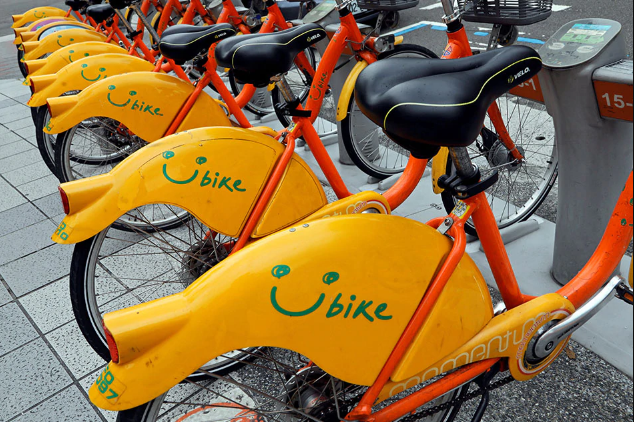

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.
$$\widehat\theta = (X^TX + \lambda I_k)^{-1}X^Ty$$

In [40]:
class RidgeRegression:

    lambd = 0
    fit_intercept = 0
    model_coefs = None
    const_feature = None

    def __init__(self, lambd=0.1, fit_intercept=True):
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        
    def fit(self, X, Y):

        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))

        n, m = X.shape
        self.const_feature = np.identity(m)

        self.model_coefs = np.linalg.inv(X.T @ X + self.lambd * self.const_feature) @ X.T @ Y
        
        return self
    
    
    def predict(self, X):

        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))

        predictions = X @ self.model_coefs.T        
        
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/ML_pipeline.pdf">презентации</a> с занятия.

In [41]:
train, test = train_test_split(data, test_size=0.2)
train, validate = train_test_split(train, test_size=0.25)

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее в данном задании.

In [42]:
#Произведем стандартизацию 
standartization =  preprocessing.StandardScaler()
train[real_features] = standartization.fit_transform(train[real_features])
test[real_features] = standartization.transform(test[real_features])
validate[real_features] = standartization.transform(validate[real_features])

#Собираем все в один DF

X_train = np.hstack([train[real_features], categorial_encoding(train, categorial_features)])
X_test = np.hstack([test[real_features], categorial_encoding(test, categorial_features)])
X_validate = np.hstack([validate[real_features], categorial_encoding(validate, categorial_features)])
print(X_test)

[[-0.16783627  0.68901921  1.11961913 ...  1.          0.
   0.        ]
 [-0.16783627 -1.45133834 -0.70340384 ...  0.          0.
   0.        ]
 [-0.16783627  0.68901921 -0.70340384 ...  1.          0.
   0.        ]
 ...
 [-0.16783627 -1.45133834 -0.70340384 ...  0.          0.
   0.        ]
 [-0.16783627  0.68901921  1.11961913 ...  0.          0.
   1.        ]
 [-0.16783627  0.68901921 -0.70340384 ...  0.          0.
   0.        ]]


Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [44]:
log_grid = np.logspace(-3, 3, num=100)
ridge_models = []


for lambd in log_grid:
    model = RidgeRegression()
    RidgeRegression.__init__(model, lambd)
    model = RidgeRegression.fit(model, X_train, train[target_feature])
    ridge_models.append(model)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

In [52]:
RMSE_train_data = []
RMSE_validate_data = []

MAE_train_data = []
MAE_validate_data = []

MAPE_train_data = []
MAPE_validate_data = []

max_lambda_model = 0
max_score = 1000000

for model in ridge_models:

    ridge_train_preds = model.predict(X_train)
    ridge_validate_preds = model.predict(X_validate)
    print(model.lambd)

    #RMSE
    rmse_train_ = np.sqrt(((train[target_feature] - ridge_train_preds) ** 2).mean())
    RMSE_train_data.append(rmse_train_)
    print("RMSE train: ", rmse_train_)

    rmse_val_ = np.sqrt(((validate[target_feature] - ridge_validate_preds) ** 2).mean())
    RMSE_validate_data.append(rmse_val_)
    print("RMSE validate: ", rmse_val_)

    #MAE
    mae_train_ = metrics.mean_absolute_error(train[target_feature], ridge_train_preds)
    MAE_train_data.append(mae_train_)
    print("MAE train: ", mae_train_)

    mae_val_ = metrics.mean_absolute_error(validate[target_feature], ridge_validate_preds)
    MAE_validate_data.append(mae_val_)
    print("MAE validate: ", mae_val_)

    #MAPE
    mape_train_ = mean_absolute_percentage_error(train[target_feature], ridge_train_preds)
    MAPE_train_data.append(mape_train_)
    print("MAPE train: ", mape_train_)

    mape_val_ = mean_absolute_percentage_error(validate[target_feature], ridge_validate_preds)
    MAPE_validate_data.append(mape_val_)
    print("MAPE validate: ", mape_val_)
    print('\n')
    
    if (mape_val_ < max_score):
        max_score = mape_val_
        max_lambda_model = model

0.001
RMSE train:  1249.7120229428185
RMSE validate:  1362.0865930197322
MAE train:  1076.1401155326776
MAE validate:  1156.561261102695
MAPE train:  69.53911471765865
MAPE validate:  34.74256739834654


0.0011497569953977356
RMSE train:  1249.712026014799
RMSE validate:  1362.0860861017213
MAE train:  1076.1410946947735
MAE validate:  1156.5606807793577
MAPE train:  69.53913855740569
MAPE validate:  34.7425459158751


0.0013219411484660286
RMSE train:  1249.7120300738325
RMSE validate:  1362.0855038278446
MAE train:  1076.142220200019
MAE validate:  1156.5600139103374
MAPE train:  69.5391659458918
MAPE validate:  34.742521230592686


0.0015199110829529332
RMSE train:  1249.712035436683
RMSE validate:  1362.084835069452
MAE train:  1076.1435138786733
MAE validate:  1156.5592476450909
MAPE train:  69.5391974079028
MAPE validate:  34.742492867237154


0.001747528400007683
RMSE train:  1249.7120425215712
RMSE validate:  1362.0840671138133
MAE train:  1076.145000786079
MAE validate:  1156.

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок. 

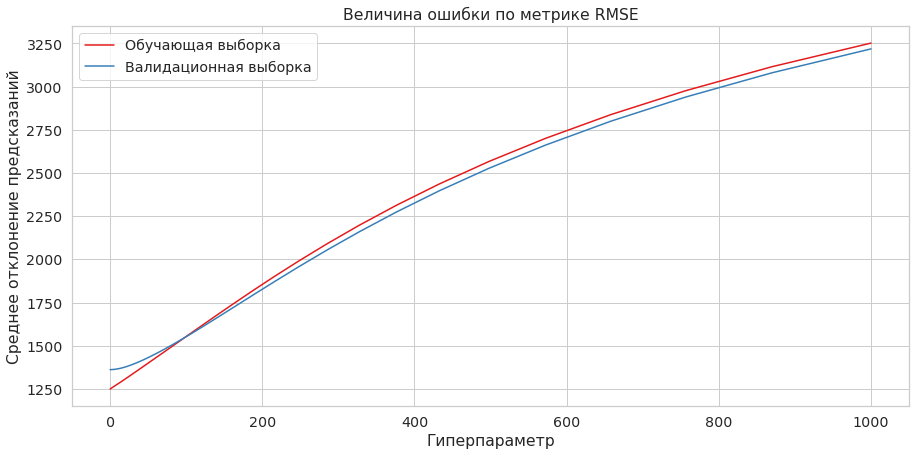

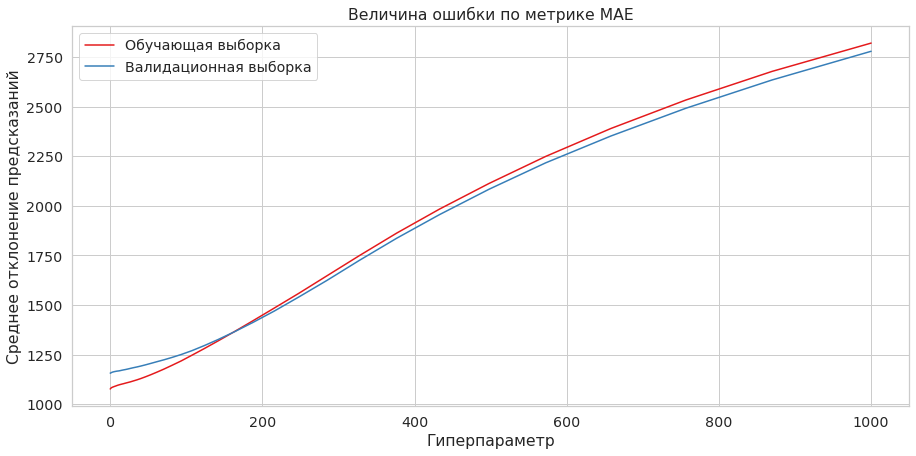

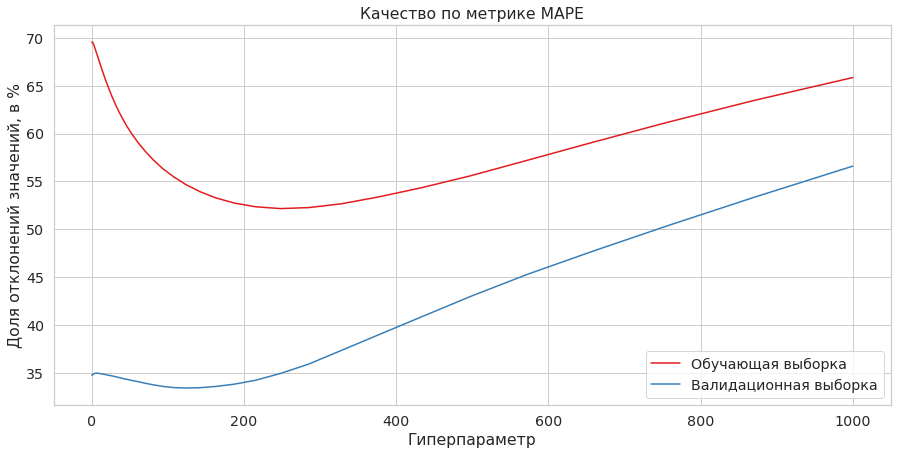

In [53]:
#RMSE 

plt.figure(figsize=(15, 7))
plt.plot(log_grid, RMSE_train_data, label='Обучающая выборка')
plt.plot(log_grid, RMSE_validate_data, label='Валидационная выборка')
plt.xlabel('Гиперпараметр')
plt.ylabel('Среднее отклонение предсказаний')
plt.title("Величина ошибки по метрике RMSE")
plt.legend()

#MAE 

plt.figure(figsize=(15, 7))
plt.plot(log_grid, MAE_train_data, label='Обучающая выборка')
plt.plot(log_grid, MAE_validate_data, label='Валидационная выборка')
plt.xlabel('Гиперпараметр')
plt.ylabel('Среднее отклонение предсказаний')
plt.title("Величина ошибки по метрике MAE")
plt.legend()

#MAPE 

plt.figure(figsize=(15, 7))
plt.plot(log_grid, MAPE_train_data, label='Обучающая выборка')
plt.plot(log_grid, MAPE_validate_data, label='Валидационная выборка')
plt.xlabel('Гиперпараметр')
plt.ylabel('Доля отклонений значений, в %')
plt.title("Качество по метрике MAPE")
plt.legend()

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

Транспонируем наш массив моделей, чтобы строить по конкретным признакам

In [47]:
graphic_data = np.zeros((27, (len(ridge_models))))
for ind in range(len(ridge_models)):
    for i in range(27):
        graphic_data[i][ind] = ridge_models[ind].model_coefs[i]

Text(0.5, 1.0, 'Зависимость оценок коэффициентов от гиперпараметра')

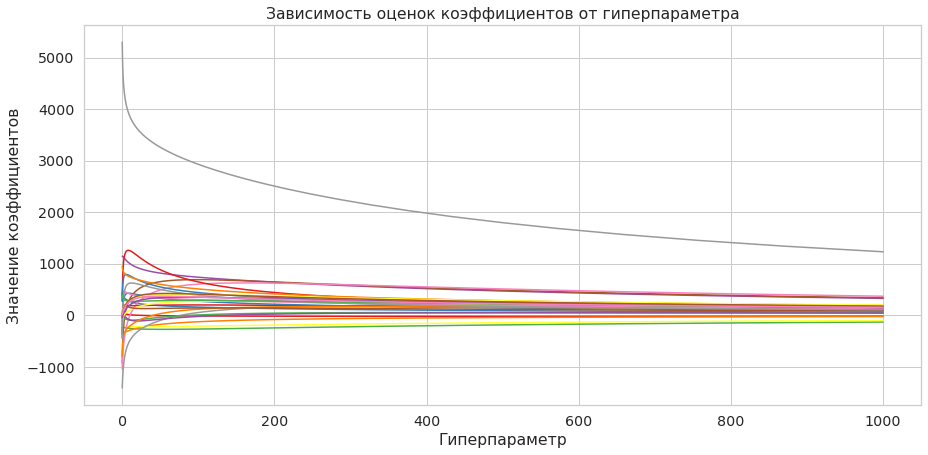

In [48]:
plt.figure(figsize=(15, 7))
for j in range(27):
    plt.plot(log_grid, graphic_data[j])

plt.xlabel('Гиперпараметр')
plt.ylabel('Значение коэффициентов')
plt.title("Зависимость оценок коэффициентов от гиперпараметра")

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [51]:
ridge_test_preds = max_lambda_model.predict(X_test)
result = mean_absolute_percentage_error(test[target_feature], ridge_test_preds)
print("Отклонение на лучшем гиперпараметре: ", result)

Отклонение на лучшем гиперпараметре:  31.029439068223514


**Выводы:**

Из вышеописанного видно, что с увеличением гиперпараметра идет уменьшение качества модели. На графике "Зависимость оценок коэффициентов от гиперпараметра" видно, как веса сглаживаются, устанавливаются постоянными и приближаются к нулевому значению. 
Наименьшая ошибка достигается на первых шагах, например, на графике "Качество по метрике MAPE" хорошо заметны гиперболическая зависимость и минимум для валидационных данных, что связано с явным видом формулы.

Впрочем, итоговое отклонение осталось на прежнем значении по сравнению с результатами задачи №2.

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

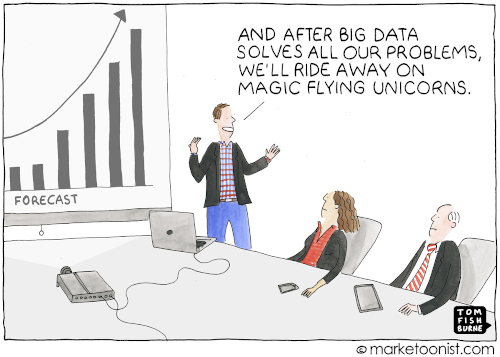

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.